In [1]:
%matplotlib inline  

import os

import scipy as sp
import scipy.stats

import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
brain = nib.load('fse2d_brain.nii.gz')
mask  = nib.load('fse2d_mask.nii.gz')

In [3]:
brain_img = brain.get_data()
mask_img  = mask.get_data()

In [4]:
brain_img_vec = np.reshape(brain_img, np.size(brain_img)).astype(int)
mask_img_vec  = np.reshape(mask_img,  np.size(mask_img )).astype(int)

In [5]:
brain_img_vec_masked = brain_img_vec[mask_img_vec.astype(bool)]
brain_kde = sp.stats.gaussian_kde(brain_img_vec_masked)

In [6]:
for i, elem in enumerate(sp.linspace(np.min(brain_img_vec), np.max(brain_img_vec), 1000)):
    if brain_kde.integrate_box_1d(np.min(brain_img_vec), elem) > 0.935:
        print '  | ', i, elem
        csf_thresh = elem
        break

  |  330 5728.25825826


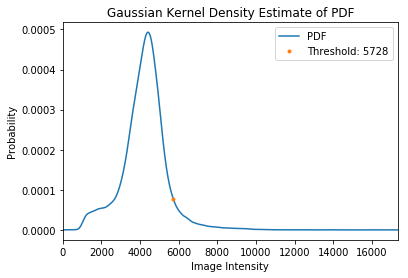

In [7]:
plt.figure()
plt.plot(sp.linspace(np.min(brain_img_vec), np.max(brain_img_vec), 1000), brain_kde(sp.linspace(np.min(brain_img_vec), np.max(brain_img_vec), 1000)))
plt.plot(csf_thresh, brain_kde(csf_thresh), '.')
plt.title('Gaussian Kernel Density Estimate of PDF')
plt.xlim(0, np.max(brain_img_vec))
plt.xlabel('Image Intensity')
plt.ylabel('Probability')
plt.legend(['PDF', 'Threshold: '+str(int(csf_thresh))])

In [8]:
brain_csf_mask = brain_img >= int(csf_thresh)
brain_csf_mask = brain_csf_mask.astype(int)
brain_csf_mask_file = nib.Nifti1Image(brain_csf_mask, brain.get_qform())
brain_csf_mask_file.to_filename('fse2d_csf_mask.nii.gz')